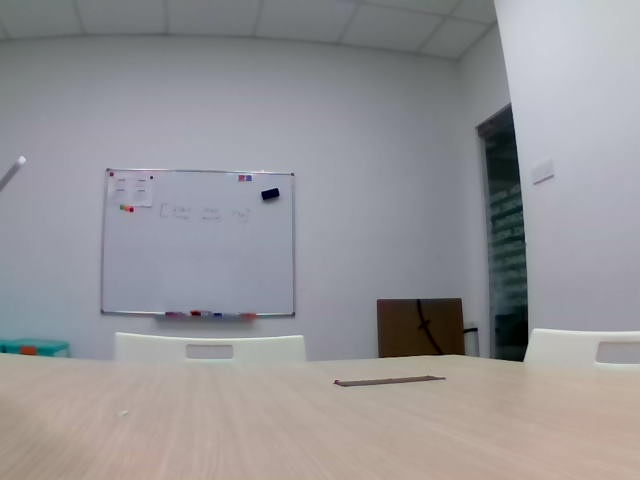

Stream stopped manually


In [1]:
import cv2
import numpy as np
from IPython.display import display, clear_output, Image
from ugot import ugot
import time

got = ugot.UGOT()
got.initialize('192.168.1.217')
got.open_camera()

def main():
    try:
        while True:
            frame = got.read_camera_data()
            if not frame:
                print("Failed to grab frame")
                break

            # Decode frame into numpy array
            nparr = np.frombuffer(frame, np.uint8)
            data = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

            # Encode to JPEG for display
            _, jpeg = cv2.imencode('.jpg', data)

            # Clear previous frame and show new one
            clear_output(wait=True)
            display(Image(data=jpeg.tobytes()))

            time.sleep(0.03)  # small delay to reduce flickering + CPU usage

    except KeyboardInterrupt:
        print("Stream stopped manually")

main()


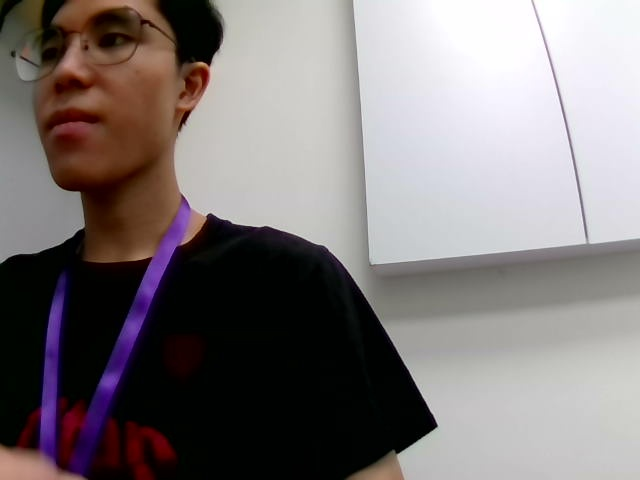

Stream stopped manually


In [5]:
import cv2
import numpy as np
from IPython.display import display, clear_output, Image
from ugot import ugot
import time

got = ugot.UGOT()
got.initialize('192.168.1.217')
got.open_camera()
got.load_models(["gesture"])

def main():
    try:
        while True:
            gesture = got.get_gesture_result()
            if gesture == "OK":
                got.mecanum_move_speed(1, 20)
            else:
                got.mecanum_stop()

            frame = got.read_camera_data()
            if not frame:
                print("Failed to grab frame")
                break

            # Decode frame into numpy array
            nparr = np.frombuffer(frame, np.uint8)
            data = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

            # Encode to JPEG for display
            _, jpeg = cv2.imencode('.jpg', data)

            # Clear previous frame and show new one
            clear_output(wait=True)
            display(Image(data=jpeg.tobytes()))

            time.sleep(0.03)  # small delay to reduce flickering + CPU usage

    except KeyboardInterrupt:
        print("Stream stopped manually")

main()


In [ ]:
camera = 2

In [ ]:
camera.start()
frame = camera.get()

In [ ]:
import cv2
from ugot import ugot

got = ugot.UGOT()
got.open_camera()